In [1]:
#Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)             ## Data set Shape
print(boston.feature_names)          ## Column Names
print(boston.DESCR)                  ## Brief description about the data set

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX   

In [3]:
df = pd.DataFrame(boston.data)
print(df.head(5))

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
#Assign proper names to the columns
df.columns = boston.feature_names
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [5]:
# Adding a new column to data set with price against each observation
# This will make the complete data set ready for Linear Regression
df['PRICE'] = boston.target
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [6]:
# Split data for training and testing. 77% data for training
X = df.drop('PRICE',axis=1)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X, df.PRICE, test_size=0.33, ## Test Data = 33%
                                                 random_state=42)


In [7]:
# Apply LInear Regression model to predict the data
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)

Text(0,0.5,'Predicted price')

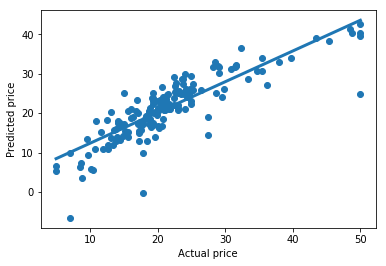

In [8]:
# Draw a scatter plot between predicted price and actual price and draw a fit line
plt.scatter(y_test,pred_test)
plt.plot(np.unique(y_test),
        np.poly1d(np.polyfit(y_test,pred_test,1))(np.unique(y_test)),
        linewidth=3)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [9]:
coeff_df = pd.DataFrame(X_train.columns, lm.coef_)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print(mse)

                  0
-0.128060      CRIM
 0.037796        ZN
 0.058611     INDUS
 3.240070      CHAS
-16.222268      NOX
 3.893522        RM
-0.012788       AGE
-1.423269       DIS
 0.234513       RAD
-0.008203       TAX
-0.929951   PTRATIO
 0.011915         B
-0.548490     LSTAT
20.747143360308975


In [ ]:
# Logistic Regression

In [20]:
from sklearn import linear_model, datasets
iris = datasets.load_iris() # iris.data is ndarray type

X = iris.data[:,:2] #Sepal Width and Sepal Height columns
Y = iris.target     # Species -> Setosa, Versicolor, Virginica

In [22]:
# Set Logistical Regression model with inverse of regularization strenth as 1L to avoid overfitting
lm = linear_model.LogisticRegression(C=1e5)
lm.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
#  Now define the decision boundary for each species based on selected features
# create a mesh grid whose X and Y-axis range is equal to the 
# minimum and maximum range of Sepal Height and Sepal Width
x_min, x_max = X[:,0].min() - .5,X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - .5,X[:,1].max() + 0.5

h = 0.2       # Step size in mesh

# Mesh Grid
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

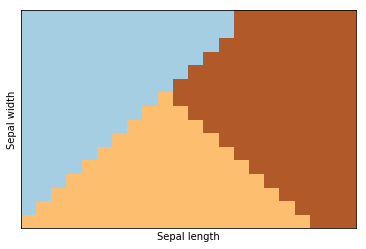

In [25]:
#  predict the decision boundary with the given data 
# visualize it using colored mesh
# Put the result into a color plot
Z = lm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Labeling
plt.figure(1, figsize=(4, 3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(());
plt.yticks(());
plt.show()

# (in order: Blue: Setosa, Orange: Versicolor and Brown: Virginica)

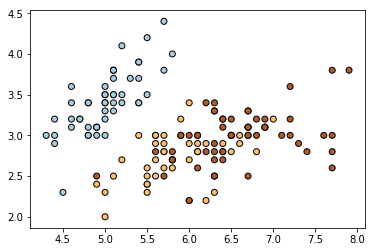

In [26]:
plt.scatter(X[:, 0], X[:, 1],c=Y, edgecolors='k', cmap=plt.cm.Paired)